## Hepatitis Classification

Given *medical patient data*, let's try to predict whether a given patient will have **hepatitis** or not.

We will use a random forest classifier model to make our predictions.

Data source: https://www.kaggle.com/datasets/codebreaker619/hepatitis-data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [18]:
data = pd.read_csv('archive/hepatitis_csv.csv')
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

### Preprocessing

In [60]:
df = data.copy()

In [61]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [62]:
df.isna().mean()*100

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

In [63]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [64]:
# Identify the continuous numeric features
continuous_features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin']

# Fill missing values
for column in continuous_features:
    df[column] = df[column].fillna(df[column].mean())

In [65]:
for column in df.columns.drop(continuous_features):
    df[column] = df[column].fillna(df[column].mode()[0])

/tmp/ipykernel_11075/2703954483.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0])


In [66]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,100.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,100.0,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,100.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,100.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,105.325397,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.000000,142.0,4.3,100.0,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.000000,20.0,4.1,100.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.000000,19.0,4.1,48.0,True,live


In [67]:
df.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [68]:
# Convert the boolean columns into integer columns
for column in df.select_dtypes('bool'):
    df[column] = df[column].astype(int)

In [69]:
# Encode the sex column as a binary feature
df['sex'] = df['sex'].replace({
    'female': 0,
    'male': 1
})

/tmp/ipykernel_11075/44857590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({


In [70]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,100.0,0,live
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,100.0,0,live
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,100.0,0,live
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.0,0,live
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,100.0,0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105.325397,242.0,3.3,50.0,1,die
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.000000,142.0,4.3,100.0,1,live
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.000000,20.0,4.1,100.0,1,live
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.000000,19.0,4.1,48.0,1,live


In [71]:
# Shuffle the data
df = df.sample(frac=1.0, random_state=1).reset_index(drop=True)

In [72]:
# Drop protime column because of more than 25% missing values
# df = df.drop('protime', axis=1)

In [73]:
# Change the label name 
df = df.rename(columns={'class': 'label'})

# Split df into X and y
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

In [74]:
y

0      live
1      live
2      live
3       die
4       die
       ... 
150    live
151    live
152    live
153    live
154    live
Name: label, Length: 155, dtype: object

In [75]:
X

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.000000,81.0,3.900000,62.0,1
1,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.000000,45.0,4.100000,56.0,0
2,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.000000,20.0,4.000000,100.0,0
3,62,0,0,0,1,1,0,1,0,0,0,0,0,1.0,105.325397,60.0,3.817266,100.0,0
4,37,0,1,0,1,0,0,1,0,0,1,0,0,0.6,67.000000,28.0,4.200000,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,72,0,1,1,1,0,0,1,1,0,0,0,0,1.0,115.000000,52.0,3.400000,50.0,1
151,38,0,1,0,0,0,0,1,1,0,1,0,1,1.6,130.000000,140.0,3.500000,56.0,1
152,51,0,1,0,1,1,1,1,0,0,0,0,0,0.9,76.000000,271.0,4.400000,100.0,0
153,36,0,0,0,1,1,1,0,1,0,1,0,1,1.7,295.000000,60.0,2.700000,100.0,1


### Clustering

In [76]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int32)

In [77]:
pca = PCA(n_components=2)

X_reduced = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=['PC1', 'PC2'])
X_reduced

,PC1,PC2
0,0.365404,34.768812
1,-46.779666,-42.990615
2,-68.719545,-12.087919
3,-26.068028,2.424163
4,-63.282490,-30.988801
...,...,...
150,-30.994058,15.571543
151,57.598266,18.067522
152,178.695929,-55.689508
153,-0.442036,190.134537


In [78]:
cluster_labels = pd.Series(cluster_labels, name='cluster')
cluster_labels

0      0
1      0
2      0
3      0
4      0
      ..
150    0
151    0
152    1
153    0
154    0
Name: cluster, Length: 155, dtype: int32

In [79]:
X_reduced = pd.concat([X_reduced, y, cluster_labels], axis=1)
X_reduced

,PC1,PC2,label,cluster
0,0.365404,34.768812,live,0
1,-46.779666,-42.990615,live,0
2,-68.719545,-12.087919,live,0
3,-26.068028,2.424163,die,0
4,-63.282490,-30.988801,die,0
...,...,...,...,...
150,-30.994058,15.571543,live,0
151,57.598266,18.067522,live,0
152,178.695929,-55.689508,live,1
153,-0.442036,190.134537,live,0


In [80]:
kmeans.cluster_centers_

array([[4.09548872e+01, 1.05263158e-01, 5.11278195e-01, 1.65413534e-01,
        6.16541353e-01, 3.68421053e-01, 1.87969925e-01, 8.42105263e-01,
        3.53383459e-01, 1.87969925e-01, 3.00751880e-01, 1.27819549e-01,
        1.05263158e-01, 1.32755715e+00, 1.01760413e+02, 5.81772644e+01,
        3.83038892e+00, 7.95714286e+01, 4.36090226e-01],
       [4.26818182e+01, 9.09090909e-02, 5.00000000e-01, 9.09090909e-02,
        8.63636364e-01, 5.45454545e-01, 3.18181818e-01, 8.18181818e-01,
        5.90909091e-01, 2.27272727e-01, 5.00000000e-01, 1.36363636e-01,
        1.81818182e-01, 2.03181818e+00, 1.26877345e+02, 2.53454545e+02,
        3.73793329e+00, 7.09090909e+01, 5.45454545e-01]])

In [81]:
centroids = pca.transform(kmeans.cluster_centers_)
centroids

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-27.96982461,   0.24015379],
       [169.09030333,  -1.4518388 ]])

In [82]:
X_reduced.query("cluster == 0")

,PC1,PC2,label,cluster
0,0.365404,34.768812,live,0
1,-46.779666,-42.990615,live,0
2,-68.719545,-12.087919,live,0
3,-26.068028,2.424163,die,0
4,-63.282490,-30.988801,die,0
...,...,...,...,...
149,-57.959394,-13.577366,live,0
150,-30.994058,15.571543,live,0
151,57.598266,18.067522,live,0
153,-0.442036,190.134537,live,0


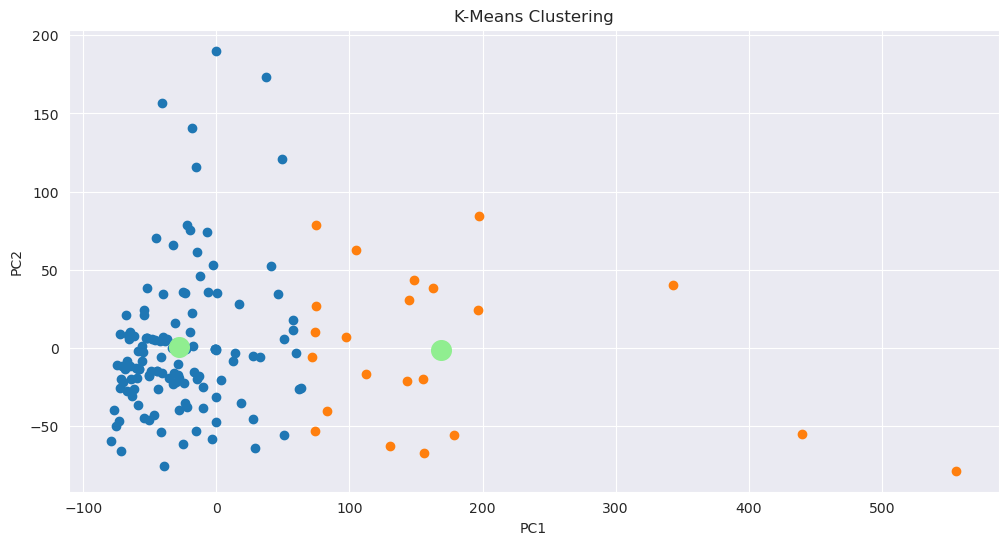

In [83]:
cluster_0_examples = X_reduced.query("cluster == 0")
cluster_1_examples = X_reduced.query("cluster == 1")

fig = plt.figure(figsize=(12,6))
plt.scatter(cluster_0_examples['PC1'], cluster_0_examples['PC2'], label='Cluster A')
plt.scatter(cluster_1_examples['PC1'], cluster_1_examples['PC2'], label='Cluster B')
plt.scatter(centroids[:, 0], centroids[:, 1], c='lightgreen', s=200, label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

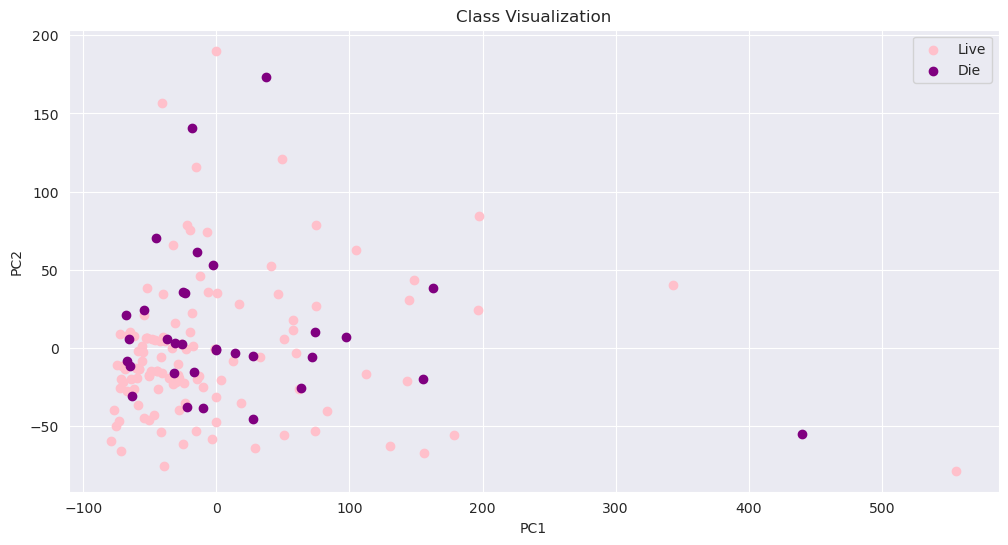

In [84]:
live_examples = X_reduced.query("label == 'live'")
die_examples = X_reduced.query("label == 'die'")

fig = plt.figure(figsize=(12,6))
plt.scatter(live_examples['PC1'], live_examples['PC2'], c='pink',  label='Live')
plt.scatter(die_examples['PC1'], die_examples['PC2'], c = 'purple', label='Die')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Class Visualization')
plt.legend()
plt.show()

### Training

In [85]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [92]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 85.11%
